## Naomi, Parshana, Sinchana, Joanna

In [639]:
%pip install pandas numpy matplotlib scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [640]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## TASK 1 - EDA

### Question 1

In [641]:
df_main = pd.read_csv("S19_All_Release_2_10_22/Data/MainTable.csv")
df_subj = pd.read_csv("S19_All_Release_2_10_22/Data/LinkTables/Subject.csv")
df_problems = pd.read_csv("2nd CSEDM Data Challenge - Problem Prompts & Concepts Used - Sheet1.CSV")

In [642]:
# Number of unique students - using MainTable.csv
len(df_main['SubjectID'].unique())

413

In [643]:
# Number of unique students - using LinkTables/Subject.csv
len(df_subj['SubjectID'].unique())
# Less because some people dropped the class

372

### Question 2

In [644]:
df_early = pd.read_csv("S19_All_Release_2_10_22/early.csv")
df_late = pd.read_csv("S19_All_Release_2_10_22/late.csv")
df_all = pd.concat([df_early, df_late])

In [645]:
mean_attempts = df_all.groupby(['AssignmentID', 'ProblemID'])['Attempts'].mean()
mean_attempts.head()
print(f"Assignment {mean_attempts.idxmax()[0]} Problem {mean_attempts.idxmax()[1]} had the most attempts at {mean_attempts.max()}.")

Assignment 487.0 Problem 102 had the most attempts at 10.422535211267606.


### Question 3

In [646]:
df_main = pd.read_csv("S19_All_Release_2_10_22/Data/MainTable.csv")
df_compile = df_main[df_main['EventType'] == "Compile"]

In [647]:
compile_errors = df_compile[df_compile['Compile.Result'] == 'Error']
grouped_compile_errors = compile_errors.groupby(['AssignmentID', 'ProblemID'])['Compile.Result'].size()
print(f"Assignment {grouped_compile_errors.idxmax()[0]} Problem {grouped_compile_errors.idxmax()[1]} had the most compile errors at {grouped_compile_errors.max()}.")

Assignment 439.0 Problem 13 had the most compile errors at 2440.


Computing the total number of compiler errors faced on each problem, and report the maximum is more meaningful because it directly answers which problems had the most compile errors from all students. This is more meaningful for knowing which problems students as a whole struggled with compiling.

## Task 2 - Open-Ended Analysis

### Predicting Score from problem features

In [648]:
df_subj

,SubjectID,X-Grade
0,65be44ae7088566069cc3bef454174a7,0.3600
1,0bdf2c1f053650715e1f0c725d754b96,0.3917
2,ad8d3a0a0f0a084a97fad357c649438c,0.6160
3,f4db8537e9d75da46c4efc36a2d70956,0.4310
4,d7419ae04f248e5105ac3d0700389775,0.7244
...,...,...
368,e2d083a5fd066b082d93042169313e21,0.6800
369,2e667fca5e24ac13dcee94ddc4aa751a,0.0000
370,65a5e77645ee9f1918165a0a8c503297,0.0000
371,c8720c9e82b818798e7b391fd62adf33,0.9200


In [649]:
df_main

,Order,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,CourseSectionID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,ParentEventID,SourceLocation
0,119630,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Run.Program,1.00,NaN,NaN,NaN,1-69176,NaN,NaN
1,119631,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Compile,NaN,Success,NaN,NaN,1-69177,1-69176,NaN
2,134330,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Run.Program,1.00,NaN,NaN,NaN,3-68089,NaN,NaN
3,134331,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Compile,NaN,Success,NaN,NaN,3-68090,3-68089,NaN
4,65666,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:09:54,UTC,CS 1,1,439.0,5,2697d299e7c5992f557ce38d8a04345112a11af8,True,Run.Program,0.75,NaN,NaN,NaN,5-35681,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201565,108283,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-05T23:46:43,0,CS 1,1,502.0,71,9e7128eff25bb3a3a9860fa47cfe100c08f31f58,True,Compile,NaN,Success,NaN,NaN,71-3029,71-3028,NaN
201566,110202,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-05T23:50:16,0,CS 1,1,502.0,112,6f094eec8e43a75c47ef236a487cc76442cc7b7b,True,Run.Program,1.00,NaN,NaN,NaN,112-2391,NaN,NaN
201567,110203,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-05T23:50:16,0,CS 1,1,502.0,112,6f094eec8e43a75c47ef236a487cc76442cc7b7b,True,Compile,NaN,Success,NaN,NaN,112-2392,112-2391,NaN
201568,81273,ffb72475a81de0e95b910ffad039f5c2,Java 8; CodeWorkout,2019-05-06T00:02:36,0,CS 1,1,502.0,118,899f7092e7960366de80fdfca077387ac5c26a04,True,Run.Program,1.00,NaN,NaN,NaN,118-5994,NaN,NaN


In [650]:
df_score = df_main[df_main['EventType'] == "Run.Program"]
df_score = df_score.groupby(['SubjectID', 'AssignmentID', 'ProblemID'])['Score'].max().reset_index()
df_score.head()

,SubjectID,AssignmentID,ProblemID,Score
0,00c54f9462673d4c09d2a88121860841,439.0,1,1.0
1,00c54f9462673d4c09d2a88121860841,439.0,3,1.0
2,00c54f9462673d4c09d2a88121860841,439.0,5,1.0
3,00c54f9462673d4c09d2a88121860841,439.0,12,1.0
4,00c54f9462673d4c09d2a88121860841,439.0,13,1.0


In [651]:
score_problems = pd.merge(df_score, df_problems, on=['AssignmentID', 'ProblemID'], how='inner')
score_problems.head()

,SubjectID,AssignmentID,ProblemID,Score,Requirement,If/Else,NestedIf,While,For,NestedFor,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,00c54f9462673d4c09d2a88121860841,439.0,1,1.0,Write a function in Java that implements the f...,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00c54f9462673d4c09d2a88121860841,439.0,3,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00c54f9462673d4c09d2a88121860841,439.0,5,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00c54f9462673d4c09d2a88121860841,439.0,12,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00c54f9462673d4c09d2a88121860841,439.0,13,1.0,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [652]:
df_all

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,True,False
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,True,False
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,True,False
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,True,True
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,True,False
...,...,...,...,...,...,...
5717,ffb72475a81de0e95b910ffad039f5c2,502.0,64,2,True,True
5718,ffb72475a81de0e95b910ffad039f5c2,502.0,70,2,True,True
5719,ffb72475a81de0e95b910ffad039f5c2,502.0,71,1,True,True
5720,ffb72475a81de0e95b910ffad039f5c2,502.0,112,1,True,True


In [653]:
df_problems.head()

,AssignmentID,ProblemID,Requirement,If/Else,NestedIf,While,For,NestedFor,Math+-*/,Math%,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,439,1,Write a function in Java that implements the f...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,439,3,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,439,5,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,439,12,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,439,13,Write a function in Java that implements the f...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [654]:
## collapse to one row per student by averaging the number of attempts per problem

df_grades = pd.merge(df_score, df_all, on=['SubjectID', 'AssignmentID', 'ProblemID'], how='inner')
#df_grades = df_grades.groupby(['SubjectID', 'AssignmentID', 'ProblemID'])[['Attempts', 'Score']].max()
df_grades = pd.merge(df_grades, df_subj, on=['SubjectID'], how='inner')
df_grades = pd.merge(df_grades, df_problems, on=['AssignmentID', 'ProblemID'], how='inner')
df_grades.columns

Index(['SubjectID', 'AssignmentID', 'ProblemID', 'Score', 'Attempts',
       'CorrectEventually', 'Label', 'X-Grade', 'Requirement', 'If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction'],
      dtype='object')

In [655]:
important_columns = ['SubjectID', 'AssignmentID', 'ProblemID', 'Attempts', 'Score', 'X-Grade','Requirement', 'If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction']

In [656]:
df_model = df_grades[important_columns]
df_model.head()
df_max = df_model.loc[df_model.groupby(['SubjectID', 'AssignmentID', 'ProblemID'])['Score'].idxmax()]
df_max.head()

,SubjectID,AssignmentID,ProblemID,Attempts,Score,X-Grade,Requirement,If/Else,NestedIf,While,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,1.0,0.772,Write a function in Java that implements the f...,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [657]:
df_max.columns

Index(['SubjectID', 'AssignmentID', 'ProblemID', 'Attempts', 'Score',
       'X-Grade', 'Requirement', 'If/Else', 'NestedIf', 'While', 'For',
       'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr', 'LogicCompareNum',
       'LogicBoolean', 'StringFormat', 'StringConcat', 'StringIndex',
       'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction'],
      dtype='object')

In [658]:
def replace_problem_details_with_score(df):
    problem_detail_cols = ['If/Else', 'NestedIf', 'While', 'For',
       'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr', 'LogicCompareNum',
       'LogicBoolean', 'StringFormat', 'StringConcat', 'StringIndex',
       'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction']

    for col in problem_detail_cols:
        df[col] = df.apply(lambda row: row['Score'] if row[col] == 1 else row[col], axis=1)
    
    return df

df_updated = replace_problem_details_with_score(df_max)

df_updated.head()

,SubjectID,AssignmentID,ProblemID,Attempts,Score,X-Grade,Requirement,If/Else,NestedIf,While,...,LogicCompareNum,LogicBoolean,StringFormat,StringConcat,StringIndex,StringLen,StringEqual,CharEqual,ArrayIndex,DefFunction
0,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,1,8,1.0,0.772,Write a function in Java that implements the f...,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,3,6,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,5,7,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,12,2,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,036ad3e516c5bf3a4b3be35b137bcbb8,439.0,13,17,1.0,0.772,Write a function in Java that implements the f...,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [659]:
df_model = df_updated.groupby(['SubjectID', 'X-Grade'])[['If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction']].mean()

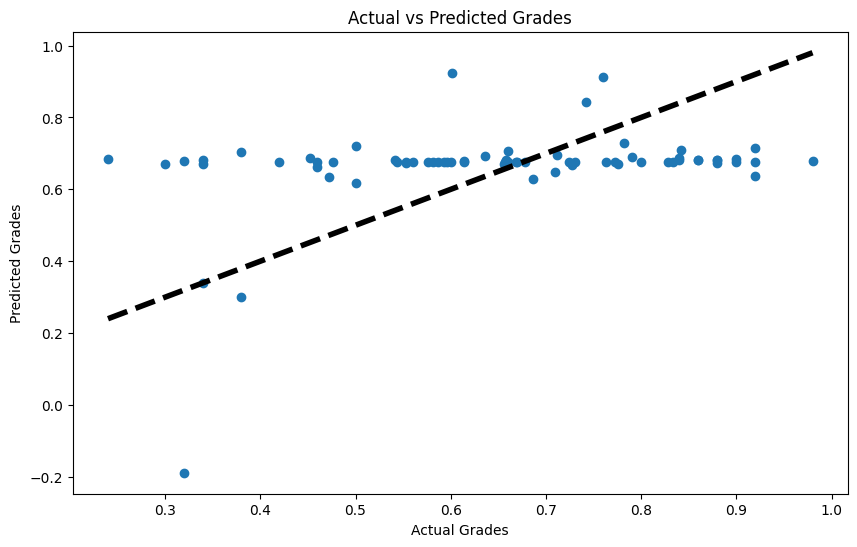

In [660]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

df_model = df_model.fillna(df_model.mean())  # or df.fillna(df.median())

df_model.reset_index(inplace=True)

X = df_model[['If/Else',
       'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%',
       'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat',
       'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual',
       'ArrayIndex', 'DefFunction']]


X_train, X_test, y_train, y_test = train_test_split(X, df_model['X-Grade'], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

